In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

def load_zipdigits(filename): #Loads the dataset from the file.
    
    data = np.loadtxt(filename)
    labels = data[:, 0].astype(int)      # shape (N,)
    pixels = data[:, 1:]                # shape (N, 256)
    images = pixels.reshape(-1, 16, 16)  # shape (N, 16, 16)
    return labels, images

# Load zipDigits.train
labels_train, images_train = load_zipdigits("zipDigits1.train")


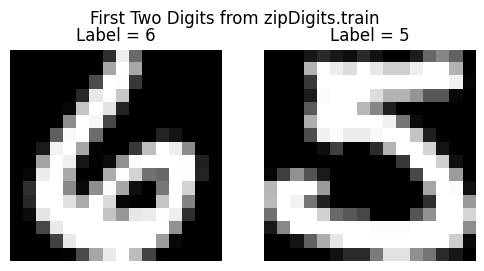

In [ ]:
# (a) Plot the FIRST TWO DIGITS in zipDigits.train

plt.figure(figsize=(6,3))

# First digit
plt.subplot(1,2,1)
plt.imshow(images_train[0], cmap='gray')
plt.title(f"Label = {labels_train[0]}")
plt.axis('off')  # Hide axis ticks

# Second digit
plt.subplot(1,2,2)
plt.imshow(images_train[1], cmap='gray')
plt.title(f"Label = {labels_train[1]}")
plt.axis('off')  # Hide axis ticks

plt.suptitle("First Two Digits from zipDigits.train")
plt.show()

In [6]:
#(b) compurte average intensity and symmetry

def compute_features(image):
   
    # 1) Average Intensity
    avg_intensity = np.mean(image)

    # 2) Left-Right Symmetry measure:
 
    left_half  = image[:, :8]
    right_half = image[:, 8:]
    # flip the right half left-to-right
    right_half_flipped = np.fliplr(right_half)
    # compute absolute difference
    diff = np.abs(left_half - right_half_flipped)
 
    symmetry_measure = - np.sum(diff)

    return (avg_intensity, symmetry_measure)

In [7]:
# Create a mask that selects only digits 1 and 5 from the training set
mask_15 = (labels_train == 1) | (labels_train == 5)
images_15 = images_train[mask_15]
labels_15 = labels_train[mask_15]

# Compute features for each image of digit 1 or 5
feature_list = []
for img in images_15:
    feat = compute_features(img)
    feature_list.append(feat)
feature_array = np.array(feature_list)

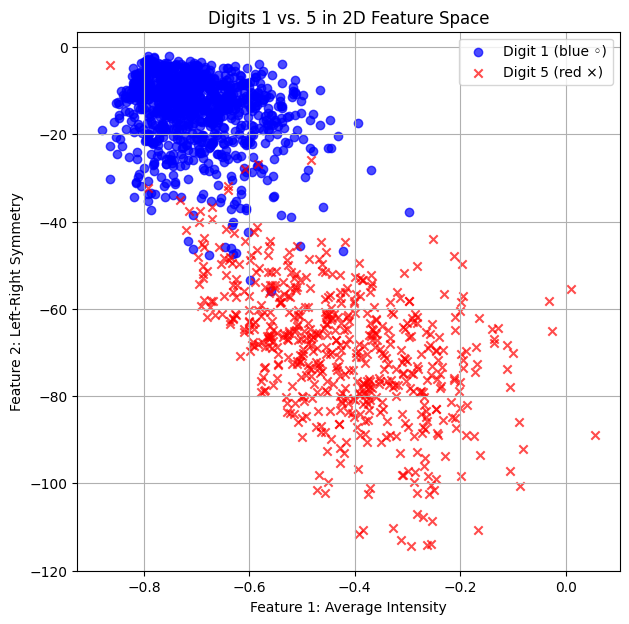

In [9]:
# plotting the first feature (avg_intensity) on the x-axis,
# and the second feature (symmetry) on the y-axis.
# red 'x' for digit 5, and a blue 'o' for digit 1,


# Separate the two features
feat_x = feature_array[:, 0]  # average intensity
feat_y = feature_array[:, 1]  # symmetry measure

# Boolean masks for each digit
is_digit1 = (labels_15 == 1)
is_digit5 = (labels_15 == 5)

plt.figure(figsize=(7,7))

# Plot digit 1 with blue 'o'
plt.scatter(feat_x[is_digit1], feat_y[is_digit1],
            marker='o', color='blue', alpha=0.7, label='Digit 1 (blue ◦)')

# Plot digit 5 with red 'x'
plt.scatter(feat_x[is_digit5], feat_y[is_digit5],
            marker='x', color='red', alpha=0.7, label='Digit 5 (red ×)')


plt.xlabel("Feature 1: Average Intensity")
plt.ylabel("Feature 2: Left-Right Symmetry")


plt.title("Digits 1 vs. 5 in 2D Feature Space")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()